<a href="https://colab.research.google.com/github/Shubham-naik-ai/Jforce/blob/main/Jforce_assignment_2(with_top_10_Features).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
# Importing usefull libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
from google.colab import drive
drive.mount('/content/drive')
working_dir_path = '/content/drive/MyDrive/Jforce/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [140]:
#Loading the clean Dataset
df = pd.read_csv(working_dir_path + 'finaldata.csv')

## **Balancing Data**

In [141]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['loan_status'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 26166
Resampled dataset shape 44374


In [142]:
x_smote

loan_amnt   funded_amnt  funded_amnt_inv  term  int_rate  \
0       2500.000000   2500.000000      2500.000000     1       141   
1      10000.000000  10000.000000     10000.000000     0        88   
2       3000.000000   3000.000000      3000.000000     1        65   
3       5000.000000   5000.000000      5000.000000     0       318   
4       7000.000000   7000.000000      7000.000000     1       159   
...             ...           ...              ...   ...       ...   
44369  10162.854366  10162.854366     10096.405545     1       141   
44370  11052.122347  11052.122347     11052.122347     0       290   
44371   3826.788474   3826.788474      3807.173768     0        78   
44372  15000.000000  15000.000000     14941.415892     0       169   
44373   5842.560131   5842.560131      5789.359967     0       100   

       installment  grade  sub_grade  emp_length  home_ownership  ...  \
0        59.830000      2         13           0               3  ...   
1       339.310000      2         10          10               3  ...   
2        67.790000      1          9           1               3  ...   
3       156.460000      0          3           3               3  ...   
4       170.080000      2         14           8               3  ...   
...            ...    ...        ...         ...             ...  ...   
44369   243.439398      3         18           2               3  ...   
44370   342.261801      0          1          10               3  ...   
44371   111.598760      1         10           7               0  ...   
44372   410.035435      2         15           8               0  ...   
44373   199.539177      2         12           2               0  ...   

       last_fico_range_high  last_fico_range_low  collections_12_mths_ex_med  \
0                499.000000             0.000000                         0.0   
1                604.000000           600.000000                         0.0   
2                694.000000           690.000000                         0.0   
3                679.000000           675.000000                         0.0   
4                654.000000           650.000000                         0.0   
...                     ...                  ...                         ...   
44369            600.742913           596.742913                         0.0   
44370            630.922151           626.922151                         0.0   
44371            665.651441           661.651441                         0.0   
44372            639.093162           635.093162                         0.0   
44373            591.128007           587.128007                         0.0   

       policy_code  application_type  acc_now_delinq  \
0              1.0                 0             0.0   
1              1.0                 0             0.0   
2              1.0                 0             0.0   
3              1.0                 0             0.0   
4              1.0                 0             0.0   
...            ...               ...             ...   
44369          1.0                 0             0.0   
44370          1.0                 0             0.0   
44371          1.0                 0             0.0   
44372          1.0                 0             0.0   
44373          1.0                 0             0.0   

       chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  
0                           0.0          0.0                     0        0.0  
1                           0.0          0.0                     0        0.0  
2                           0.0          0.0                     0        0.0  
3                           0.0          0.0                     0        0.0  
4                           0.0          0.0                     0        0.0  
...                         ...          ...                   ...        ...  
44369                       0.0          0.0                     0        0.0  
44370             

In [143]:
columns = list(df.columns)

In [144]:
columns.pop()

'loan_status'

In [145]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [146]:
balance_df['loan_status'] = y_smote

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

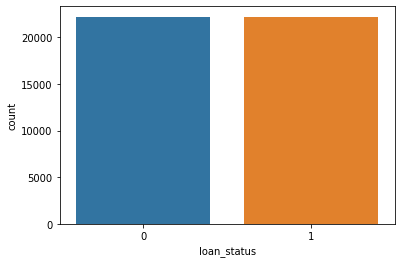

In [147]:
sns.countplot('loan_status', data = balance_df)


In [148]:
balance_df[balance_df['loan_status']==1]


loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
1        10000.0      10000.0         10000.00     0        88       339.31   
2         3000.0       3000.0          3000.00     1        65        67.79   
3         5000.0       5000.0          5000.00     0       318       156.46   
4         7000.0       7000.0          7000.00     1       159       170.08   
5         3000.0       3000.0          3000.00     0       231       109.43   
...          ...          ...              ...   ...       ...          ...   
26151    17750.0      17750.0         10395.31     0       165       624.74   
26152     7500.0       7500.0          3581.91     0       148       261.87   
26158     4800.0       4800.0          2100.00     0        92       163.17   
26159    12750.0      12750.0          2975.00     0       137       443.24   
26162     4000.0       4000.0          1500.00     0        13       130.18   

       grade  sub_grade  emp_length  home_ownership  ...  last_fico_range_low  \
1          2         10          10               3  ...                600.0   
2          1          9           1               3  ...                690.0   
3          0          3           3               3  ...                675.0   
4          2         14           8               3  ...                650.0   
5          4         20           9               3  ...                685.0   
...      ...        ...         ...             ...  ...                  ...   
26151      5         26           4               3  ...                600.0   
26152      5         25          10               0  ...                665.0   
26158      3         19           9               3  ...                  0.0   
26159      4         24           1               3  ...                640.0   
26162      2         11          10               0  ...                680.0   

       collections_12_mths_ex_med  policy_code  application_type  \
1                             0.0          1.0                 0   
2                             0.0          1.0                 0   
3                             0.0          1.0                 0   
4                             0.0          1.0                 0   
5                             0.0          1.0                 0   
...                           ...          ...               ...   
26151                         0.0          1.0                 0   
26152                         0.0          1.0                 0   
26158                         0.0          1.0                 0   
26159                         0.0          1.0                 0   
26162                         0.0          1.0                 0   

       acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  \
1                 0.0                       0.0          0.0   
2                 0.0                       0.0          0.0   
3                 0.0                       0.0          0.0   
4                 0.0                       0.0          0.0   
5                 0.0                       0.0          0.0   
...               ...                       ...          ...   
26151             0.0                       0.0          0.0   
26152             0.0                       0.0          0.0   
26158             0.0                       0.0          0.0   
26159             0.0                       0.0          0.0   
26162             0.0                       0.0          0.0   

       pub_rec_bankruptcies  tax_liens  loan_status  
1                         0        0.0            1  
2                         0        0.0            1  
3                         0        0.0            1  
4                         0        0.0            1  
5                         0        0.0            1  
...                     ...        ...          ...  
26151                     1        0.0            1  
26152                     1        0.0            1  
26158        

In [149]:
df = balance_df.copy()


In [150]:
df.head()

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0     2500.0       2500.0           2500.0     1       141        59.83   
1    10000.0      10000.0          10000.0     0        88       339.31   
2     3000.0       3000.0           3000.0     1        65        67.79   
3     5000.0       5000.0           5000.0     0       318       156.46   
4     7000.0       7000.0           7000.0     1       159       170.08   

   grade  sub_grade  emp_length  home_ownership  ...  last_fico_range_low  \
0      2         13           0               3  ...                  0.0   
1      2         10          10               3  ...                600.0   
2      1          9           1               3  ...                690.0   
3      0          3           3               3  ...                675.0   
4      2         14           8               3  ...                650.0   

   collections_12_mths_ex_med  policy_code  application_type  acc_now_delinq  \
0                         0.0          1.0                 0             0.0   
1                         0.0          1.0                 0             0.0   
2                         0.0          1.0                 0             0.0   
3                         0.0          1.0                 0             0.0   
4                         0.0          1.0                 0             0.0   

   chargeoff_within_12_mths  delinq_amnt  pub_rec_bankruptcies  tax_liens  \
0                       0.0          0.0                     0        0.0   
1                       0.0          0.0                     0        0.0   
2                       0.0          0.0                     0        0.0   
3                       0.0          0.0                     0        0.0   
4                       0.0          0.0                     0        0.0   

   loan_status  
0            0  
1            1  
2            1  
3            1  
4            1  

[5 rows x 50 columns]

### **Feature selections by ExtraTreeClassifier**

In [151]:
#separating dataset into X and y
y= df.loan_status
X = df.drop(['loan_status'] , axis = 1)

[0.0318641  0.03590057 0.02961304 0.00315168 0.0202513  0.02430983
 0.00804061 0.01118915 0.00343738 0.00807517 0.00330826 0.00440791
 0.         0.0032814  0.00295528 0.00480232 0.00278464 0.00189216
 0.00276325 0.00835789 0.00646788 0.00453349 0.0026398  0.00184158
 0.00313852 0.00327587 0.0027327  0.00064364 0.00051212 0.06435475
 0.05024846 0.12558174 0.01022597 0.00731944 0.05482138 0.02318865
 0.00538574 0.066158   0.15820422 0.08953573 0.10743906 0.
 0.         0.         0.         0.         0.         0.00136531
 0.        ]


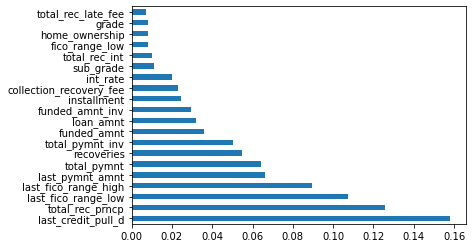

In [152]:
#Using ExtraTreeClassifier for feature selection
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [153]:
# Check feature importance
tree_importances = model.feature_importances_
tree_importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)
     

In [154]:
#checking feature importance dataframe
tree_importance_df.head(2)

feature  importance
38  last_credit_pull_d    0.158204
31     total_rec_prncp    0.125582

In [155]:

#storing top 10 features
top_ten_features=tree_importance_df.head(15)

In [156]:
top_ten_features

feature  importance
38       last_credit_pull_d    0.158204
31          total_rec_prncp    0.125582
40      last_fico_range_low    0.107439
39     last_fico_range_high    0.089536
37          last_pymnt_amnt    0.066158
29              total_pymnt    0.064355
34               recoveries    0.054821
30          total_pymnt_inv    0.050248
1               funded_amnt    0.035901
0                 loan_amnt    0.031864
2           funded_amnt_inv    0.029613
5               installment    0.024310
35  collection_recovery_fee    0.023189
4                  int_rate    0.020251
7                 sub_grade    0.011189

In [157]:
#creating dataframe only with top 10 features
df_final= df[['last_credit_pull_d','total_rec_prncp','last_fico_range_high','last_fico_range_low',
              'last_pymnt_amnt','total_pymnt','recoveries','total_pymnt_inv','funded_amnt','installment','loan_status']]

In [158]:
features = ['last_credit_pull_d','total_rec_prncp','last_fico_range_high','last_fico_range_low',
              'last_pymnt_amnt','total_pymnt','recoveries','total_pymnt_inv','funded_amnt','installment','loan_status']

In [159]:
features

['last_credit_pull_d',
 'total_rec_prncp',
 'last_fico_range_high',
 'last_fico_range_low',
 'last_pymnt_amnt',
 'total_pymnt',
 'recoveries',
 'total_pymnt_inv',
 'funded_amnt',
 'installment',
 'loan_status']

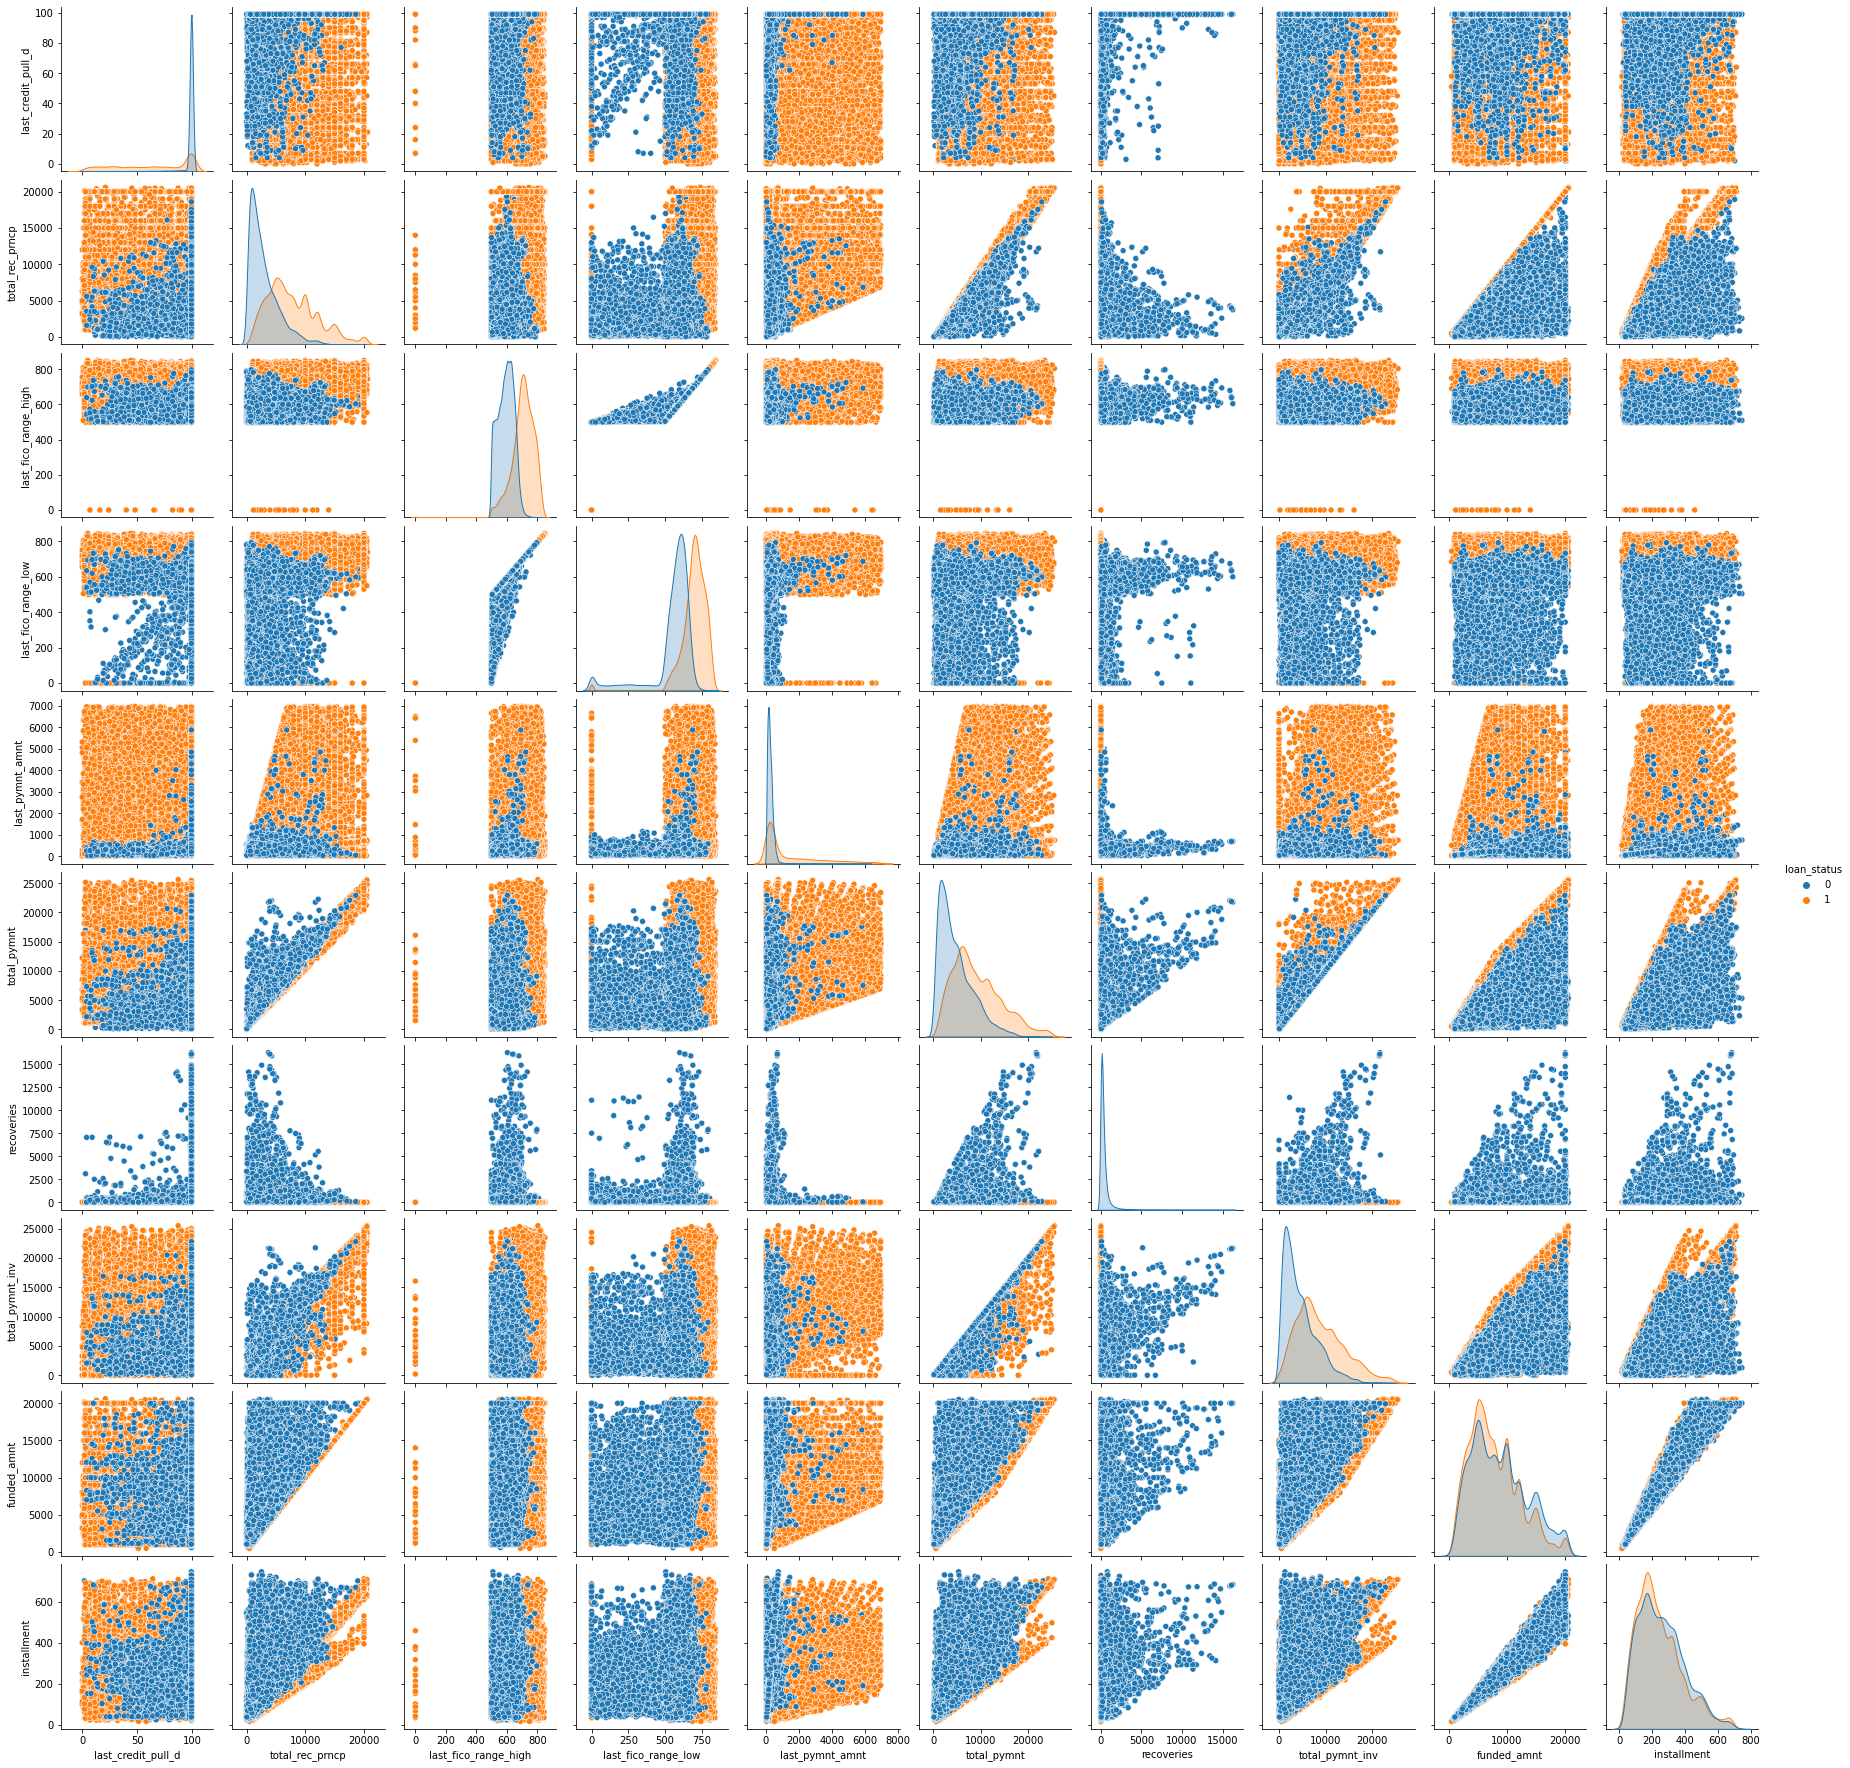

In [160]:
#visualising pairplot for all observations
sns.pairplot(data=df_final,hue='loan_status')

In [161]:
#separating dataset into X and y
y= df_final.loan_status
X = df_final.drop(['loan_status'] , axis = 1)

In [162]:
X.columns


Index(['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment'],
      dtype='object')

In [163]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
model=scaler.fit(df_final)
scaled_data=model.transform(df_final)

In [164]:
scaled_data

array([[1.        , 0.02215826, 0.58705882, ..., 0.09950249, 0.06035343,
        0.        ],
       [0.07070707, 0.48543713, 0.71058824, ..., 0.47263682, 0.44231847,
        1.        ],
       [1.        , 0.13248647, 0.81647059, ..., 0.12437811, 0.07123235,
        1.        ],
       ...,
       [1.        , 0.14282217, 0.78311934, ..., 0.16551186, 0.13110574,
        0.        ],
       [1.        , 0.27920368, 0.75187431, ..., 0.72139303, 0.53897885,
        0.        ],
       [1.        , 0.08685662, 0.69544471, ..., 0.26579901, 0.25129382,
        0.        ]])

In [165]:
df_final.columns


Index(['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_status'],
      dtype='object')

In [166]:
df1 = pd.DataFrame(scaled_data, columns = ['last_credit_pull_d', 'total_rec_prncp', 'last_fico_range_high',
       'last_fico_range_low', 'last_pymnt_amnt', 'total_pymnt', 'recoveries',
       'total_pymnt_inv', 'funded_amnt', 'installment', 'loan_status'])

In [167]:
df1

last_credit_pull_d  total_rec_prncp  last_fico_range_high  \
0                1.000000         0.022158              0.587059   
1                0.070707         0.485437              0.710588   
2                1.000000         0.132486              0.816471   
3                0.404040         0.242719              0.798824   
4                1.000000         0.339806              0.769412   
...                   ...              ...                   ...   
44369            1.000000         0.298720              0.706756   
44370            1.000000         0.318994              0.742261   
44371            1.000000         0.142822              0.783119   
44372            1.000000         0.279204              0.751874   
44373            1.000000         0.086857              0.695445   

       last_fico_range_low  last_pymnt_amnt  total_pymnt  recoveries  \
0                 0.000000         0.017166     0.038129    0.007197   
1                 0.710059         0.051290     0.477044    0.000000   
2                 0.816568         0.009724     0.146684    0.000000   
3                 0.798817         0.023102     0.218945    0.000000   
4                 0.769231         0.188501     0.395150    0.000000   
...                    ...              ...          ...         ...   
44369             0.706205         0.015343     0.410286    0.026487   
44370             0.741920         0.045922     0.320659    0.035876   
44371             0.783019         0.016010     0.157858    0.012826   
44372             0.751590         0.051946     0.433271    0.074629   
44373             0.694826         0.028628     0.098806    0.002719   

       total_pymnt_inv  funded_amnt  installment  loan_status  
0             0.039541     0.099502     0.060353          0.0  
1             0.479487     0.472637     0.442318          1.0  
2             0.148351     0.124378     0.071232          1.0  
3             0.220781     0.223881     0.192418          1.0  
4             0.397401     0.323383     0.211032          1.0  
...                ...          ...          ...          ...  
44369         0.409925     0.480739     0.311292          0.0  
44370         0.322734     0.524981     0.446353          0.0  
44371         0.158572     0.165512     0.131106          0.0  
44372         0.432616     0.721393     0.538979          0.0  
44373         0.099718     0.265799     0.251294          0.0  

[44374 rows x 11 columns]

In [168]:
from sklearn import preprocessing

In [169]:
dataset_pr = df1.copy()
     
from scipy.stats import zscore

X = dataset_pr[features].apply(zscore)
     
y = df1['loan_status']
     
X.head()

last_credit_pull_d  total_rec_prncp  last_fico_range_high  \
0            0.650221        -1.152377             -1.768666   
1           -2.448009         1.077950             -0.520208   
2            0.650221        -0.621233              0.549899   
3           -1.336687        -0.090551              0.371548   
4            0.650221         0.376849              0.074296   

   last_fico_range_low  last_pymnt_amnt  total_pymnt  recoveries  \
0            -4.245745        -0.514977    -1.196636   -0.121971   
1            -0.138691        -0.342945     1.052390   -0.280568   
2             0.477367        -0.552498    -0.640394   -0.280568   
3             0.374690        -0.485051    -0.270128   -0.280568   
4             0.203563         0.348800     0.632761   -0.280568   

   total_pymnt_inv  funded_amnt  installment  loan_status  
0        -1.149013    -1.268086    -1.372214         -1.0  
1         1.135899     0.377482     0.633039          1.0  
2        -0.583896    -1.158382    -1.315101          1.0  
3        -0.207721    -0.719564    -0.678899          1.0  
4         0.709574    -0.280746    -0.581176          1.0

## **Implementing Logistic Regression**

In [170]:
df_log_reg = df1.copy()


In [171]:
df_log_reg.head()


last_credit_pull_d  total_rec_prncp  last_fico_range_high  \
0            1.000000         0.022158              0.587059   
1            0.070707         0.485437              0.710588   
2            1.000000         0.132486              0.816471   
3            0.404040         0.242719              0.798824   
4            1.000000         0.339806              0.769412   

   last_fico_range_low  last_pymnt_amnt  total_pymnt  recoveries  \
0             0.000000         0.017166     0.038129    0.007197   
1             0.710059         0.051290     0.477044    0.000000   
2             0.816568         0.009724     0.146684    0.000000   
3             0.798817         0.023102     0.218945    0.000000   
4             0.769231         0.188501     0.395150    0.000000   

   total_pymnt_inv  funded_amnt  installment  loan_status  
0         0.039541     0.099502     0.060353          0.0  
1         0.479487     0.472637     0.442318          1.0  
2         0.148351     0.124378     0.071232          1.0  
3         0.220781     0.223881     0.192418          1.0  
4         0.397401     0.323383     0.211032          1.0

In [172]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [173]:
columns = X.columns


In [174]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [176]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [177]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [178]:
optimized_clf = grid_lr_clf.best_estimator_


In [179]:
grid_lr_clf.best_params_


{'C': 1000, 'penalty': 'l2'}

In [180]:
grid_lr_clf.best_score_


0.9992595236580865

In [181]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [182]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [183]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9994526898683236
The accuracy on test data is  0.9994741981521821


In [184]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.9994741981521821
The precision on test data is  0.9995492788461539
The recall on test data is  0.9993991287366681
The f1 on test data is  0.999474198152182
The roc_score on test data is  0.999474203791411


[[15513    17]
 [    0 15531]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

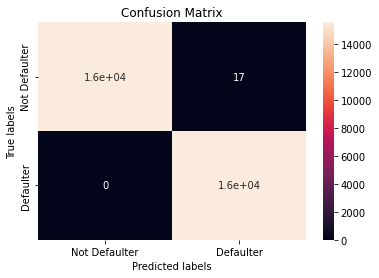

In [185]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [186]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [187]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


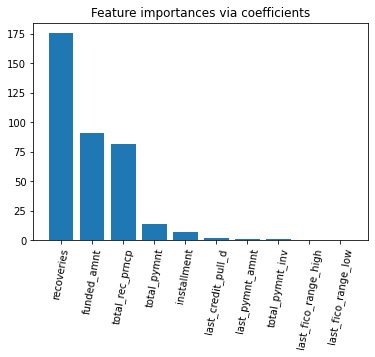

In [188]:
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [189]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


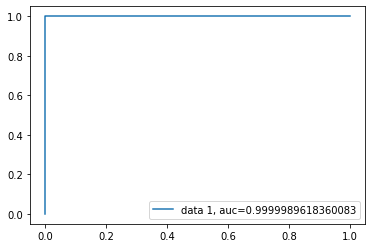

In [190]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing SVC**

In [191]:
# defining parameter range 

param_grid = {'C': [0.1, 1, 10, 100],'kernel': ['rbf']} 

In [192]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [193]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [195]:
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [196]:
optimal_SVC_clf = grid_clf.best_estimator_


In [197]:
grid_clf.best_params_


{'C': 10, 'kernel': 'rbf'}

In [198]:
grid_clf.best_score_


0.9959756535324238

In [199]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [200]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.9994526898683236
The accuracy on test data is  0.9994741981521821


In [201]:
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.997521219860287
The precision on test data is  0.9972956730769231
The recall on test data is  0.9977453780249511
The f1 on test data is  0.9975204748666315
The roc_score on test data is  0.9975213376611242


[[15524     6]
 [    0 15531]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

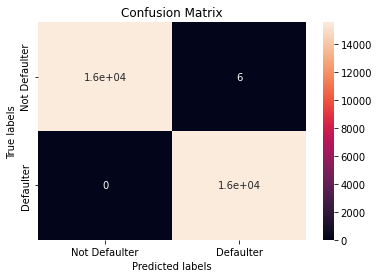

In [202]:
 # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [203]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [204]:
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]


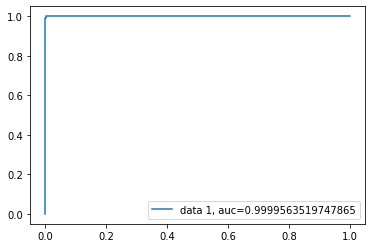

In [205]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Implementing Decision Tree**

In [206]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [207]:
from sklearn.tree import DecisionTreeClassifier  


In [208]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']


In [209]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)


In [210]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [211]:
grid_DTC_clf.best_score_


0.9662277194208686

In [212]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_


In [213]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [214]:
grid_DTC_clf.best_params_


{'max_depth': 20, 'min_samples_split': 0.1}

In [215]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.9677087022310936
The accuracy on test data is  0.9713813565687673


## **Implementing RandomForest**

In [216]:
from sklearn.ensemble import RandomForestClassifier


In [217]:
X = df.drop(['loan_status'],axis=1)
y = df['loan_status']

In [218]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [219]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [220]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9983474799068579


In [221]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9983474799068579
The precision on test data is  0.9998497596153846
The recall on test data is  0.9968544038346315
The f1 on test data is  0.9983498349834985
The roc_score on test data is  0.9983518666754896


In [222]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [223]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [224]:
grid_rf_clf.best_score_


0.9971024819866691

In [225]:
grid_rf_clf.best_params_


{'max_depth': 30, 'n_estimators': 200}

In [226]:
optimal_rf_clf = grid_rf_clf.best_estimator_


In [227]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [228]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.9979719071584165


In [229]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.9979719071584165
The precision on test data is  0.9998497596153846
The recall on test data is  0.9961083670109265
The f1 on test data is  0.9979755567219015
The roc_score on test data is  0.9979787914668625


In [230]:
len(optimal_rf_clf.feature_importances_)


49

In [231]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [232]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]


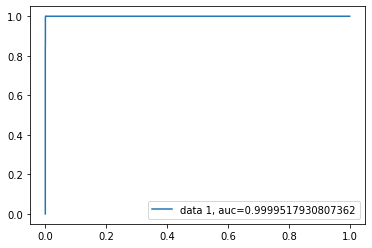

In [233]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## **Implementing XGBoost**

In [234]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [235]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [236]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [237]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

[04:33:46] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [238]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=8, microseconds=609181)

In [239]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 

#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [240]:
len(train_class_preds_probs)


31061

In [241]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [242]:
test_class_preds_probs[:20]


array([0.94833195, 0.04044214, 0.9587764 , 0.9587764 , 0.91167897,
       0.9587764 , 0.9587764 , 0.9587764 , 0.9578185 , 0.8979273 ,
       0.04044214, 0.9578185 , 0.04044214, 0.04044214, 0.04044214,
       0.04044214, 0.9587764 , 0.9587764 , 0.95440596, 0.9573996 ],
      dtype=float32)

In [243]:
test_class_preds[:20]


[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1]

In [244]:
len(y_train)


31061

In [245]:
len(train_class_preds)


31061

In [246]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9973600334825021
The accuracy on test data is  0.9966949598137159


In [247]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.9966949598137159
The precision on test data is  0.9998497596153846
The recall on test data is  0.9935801731860257
The f1 on test data is  0.9967051070840198
The roc_score on train data is  0.9967145008031414


## **Hyperparameter Tuning**

In [248]:
from xgboost import  XGBClassifier


In [249]:
X = df_log_reg.drop(['loan_status'],axis=1)
y = df_log_reg['loan_status']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify = y)

In [251]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [252]:
 gsearch1.best_score_

0.9987605284655906

In [253]:
optimal_xgb = gsearch1.best_estimator_

In [254]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [255]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9999436603847995
The accuracy on test data is  0.9990985915492958


In [256]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9990985915492958
The precision on test data is  1.0
The recall on test data is  0.9982002249718785
The f1 on test data is  0.9990993019590182
The roc_score on train data is  0.9991001124859393


In [257]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

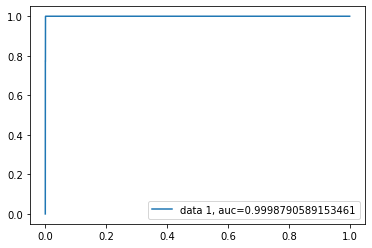

In [258]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


## **Artificial Neural Networks (ANNs)**

In [259]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (accuracy_score,  confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


In [260]:
X_train, y_train = df_log_reg.drop('loan_status', axis=1), df.loan_status
X_test, y_test = df_log_reg.drop('loan_status', axis=1), df.loan_status

In [261]:
X_train.dtypes

last_credit_pull_d      float64
total_rec_prncp         float64
last_fico_range_high    float64
last_fico_range_low     float64
last_pymnt_amnt         float64
total_pymnt             float64
recoveries              float64
total_pymnt_inv         float64
funded_amnt             float64
installment             float64
dtype: object

In [262]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [263]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [264]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [265]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [266]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
1387/1387 [==============================] - 12s 7ms/step - loss: 0.1089 - AUC: 0.9921 - val_loss: 0.0479 - val_AUC: 0.9993
Epoch 2/20
1387/1387 [==============================] - 8s 6ms/step - loss: 0.0772 - AUC: 0.9956 - val_loss: 0.0292 - val_AUC: 0.9996
Epoch 3/20
1387/1387 [==============================] - 11s 8ms/step - loss: 0.0647 - AUC: 0.9967 - val_loss: 0.0343 - val_AUC: 0.9996
Epoch 4/20
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0630 - AUC: 0.9968 - val_loss: 0.0397 - val_AUC: 0.9996
Epoch 5/20
1387/1387 [==============================] - 9s 6ms/step - loss: 0.0553 - AUC: 0.9974 - val_loss: 0.0439 - val_AUC: 0.9994
Epoch 6/20
1387/1387 [==============================] - 7s 5ms/step - loss: 0.0528 - AUC: 0.9976 - val_loss: 0.0618 - val_AUC: 0.9993
Epoch 7/20
1387/1387 [==============================] - 9s 7ms/step - loss: 0.0519 - AUC: 0.9978 - val_loss: 0.0248 - val_AUC: 0.9998
Epoch 8/20
1387/1387 [==============================] - 8s 6

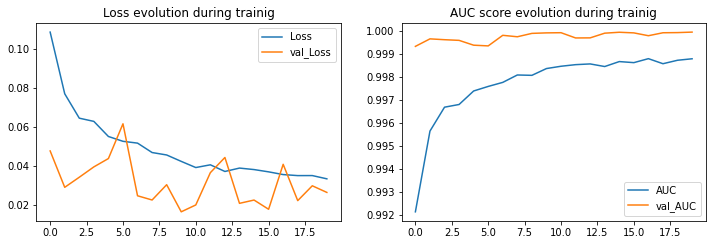

In [267]:
plot_learning_evolution(r)

In [268]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

1387/1387 [==============================] - 2s 2ms/step
Train Result:
Accuracy Score: 99.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.988840      0.998362  0.993555      0.993601      0.993601
recall         0.998377      0.988732  0.993555      0.993555      0.993555
f1-score       0.993586      0.993524  0.993555      0.993555      0.993555
support    22187.000000  22187.000000  0.993555  44374.000000  44374.000000
_______________________________________________
Confusion Matrix: 
 [[22151    36]
 [  250 21937]]



In [269]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

1387/1387 [==============================] - 2s 2ms/step
Test Result:
Accuracy Score: 99.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.988840      0.998362  0.993555      0.993601      0.993601
recall         0.998377      0.988732  0.993555      0.993555      0.993555
f1-score       0.993586      0.993524  0.993555      0.993555      0.993555
support    22187.000000  22187.000000  0.993555  44374.000000  44374.000000
_______________________________________________
Confusion Matrix: 
 [[22151    36]
 [  250 21937]]



In [270]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

1387/1387 [==============================] - 2s 2ms/step


In [271]:
ml_models = {'ANNs': model}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

1387/1387 [==============================] - 2s 2ms/step
ANNS                           roc_auc_score: 1.000


## **Evaluating the models**

In [272]:
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]

In [273]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 score': f1_score})


Classifier  Train Accuracy  Test Accuracy  Precision Score  \
0  Logistic Regression        0.999453       0.999474         0.999549   
1                  SVC        0.999807       0.997521         0.997296   
2    Random Forest CLf        1.000000       0.997972         0.999850   
3          Xgboost Clf        0.999944       0.999099         1.000000   

   Recall Score  F1 score  
0      0.999399  0.999474  
1      0.997745  0.997520  
2      0.996108  0.997976  
3      0.998200  0.999099